In [1]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import urllib
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'


स्आायकर विभाग ५७. भारत सरकार
INCOME TAX DEPARTMENT ४. GOVT. OF INDIA
ARJUN DURGA रत

RAJIBA DURGA

02/07/1990

Permanent Account Number

CHKPD8490A
Arjun Da 290

Signature

12092015




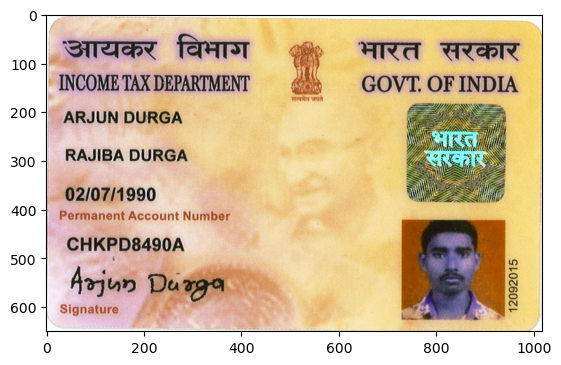

In [2]:
# def url_to_image(url):
#     resp = urllib.urlopen(url)
#     img = np.asarray(bytearray(resp.read()), dtype="uint8")
#     img = cv2.imdecode(img, cv2.IMREAD_COLOR)
#     return img

image_url = 'http://datastore01.rediff.com/h1500-w1500/thumb/52645D6963245B6D6B615C2D363730/xn0nbr0g3ghz1uwu.D.0.PAN-Card.jpg'

cap = cv2.VideoCapture(image_url)  # Open the URL as video

success, img = cap.read()  # Read the image as a video frame

if success:

    #plt.imshow(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
    text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
    text2 = pytesseract.image_to_string(threshed, lang="eng+hin")
    print(text2)
    text = text1[text1.conf != -1]
    lines = text.groupby('block_num')['text'].apply(list)
    conf = text.groupby(['block_num'])['conf'].mean()